# Preprocessing for Argoverse Data

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import os, os.path 
import numpy as np
import pickle
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

train_path = "data/new_train"
val_path = "data/new_val_in"

Sampled at 10 Hz rate
- Train: 205,942 sequences
- Val: 3200 sequences
- Test: 36272 sequences

In [2]:
class ArgoverseDataset(Dataset):
    '''Dataset class for Argoverse'''
    def __init__(self, data_path: str, transform=None):
        super(ArgoverseDataset, self).__init__()
        self.data_path = data_path
        self.transform = transform
        self.pkl_list = glob(os.path.join(self.data_path, '*'))
        self.pkl_list.sort()

    def __len__(self):
        return len(self.pkl_list)
    
    def __getitem__(self, idx):
        pkl_path = self.pkl_list[idx]
        
        with open(pkl_path, "rb") as file:
            data = pickle.load(file)
        
        if self.transform:
            data = self.transform(data)
        
        return data

In [3]:
# initialize datasets
train_data = ArgoverseDataset(train_path)
val_data = ArgoverseDataset(val_path)

In [4]:
print("TRAIN DATA SEQUENCES:", train_data.__len__())
print("VAL DATA SEQUENCES:", val_data.__len__())

TRAIN DATA SEQUENCES: 205942
VAL DATA SEQUENCES: 3200


In [5]:
for key, value in train_data.__getitem__(0).items():
    print(key, type(value))

city <class 'str'>
lane <class 'numpy.ndarray'>
lane_norm <class 'numpy.ndarray'>
scene_idx <class 'int'>
agent_id <class 'str'>
car_mask <class 'numpy.ndarray'>
p_in <class 'numpy.ndarray'>
v_in <class 'numpy.ndarray'>
p_out <class 'numpy.ndarray'>
v_out <class 'numpy.ndarray'>
track_id <class 'numpy.ndarray'>


In [6]:
# Display keys and values for a pickled object

for key, value in train_data.__getitem__(0).items():
    if key == "p_in" or key == "v_in" or key == "p_out" or key == "v_out":
        print(key, value.shape)

p_in (60, 19, 2)
v_in (60, 19, 2)
p_out (60, 30, 2)
v_out (60, 30, 2)


In [7]:
for key, value in train_data.__getitem__(0).items():
    if key == "p_in":
        print(key, value.shape)
        print(value[0][18]) # 60 (19, 2) tuples

p_in (60, 19, 2)
[3277.29638672 1947.62585449]


In [8]:
from tqdm import tqdm

# Create Distribution

100%|██████████| 3200/3200 [04:16<00:00, 12.48it/s]


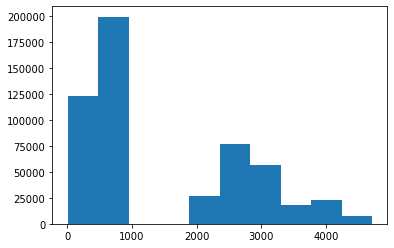

In [10]:
p_in_x = np.empty([0])
for d in tqdm(range(3200)):
    for key, value in train_data.__getitem__(d).items():
        if key == "p_in":
            for i in range(60):
                if value[i].all() != 0:
                    for j in range(19):
                        p_in_x = np.append(p_in_x, value[i][j][0])

fig = plt.hist(p_in_x, bins=10)

100%|██████████| 3200/3200 [01:46<00:00, 30.00it/s]


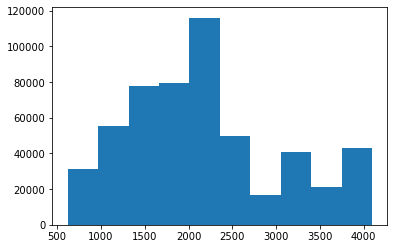

In [11]:
p_in_y = np.empty([0])
for d in tqdm(range(3200)):
    for key, value in train_data.__getitem__(d).items():
        if key == "p_in":
            for i in range(60):
                if value[i].all() != 0:
                    for j in range(19):
                        p_in_y = np.append(p_in_y, value[i][j][1])
                    
fig = plt.hist(p_in_y, bins=10)

100%|██████████| 3200/3200 [01:15<00:00, 42.13it/s]


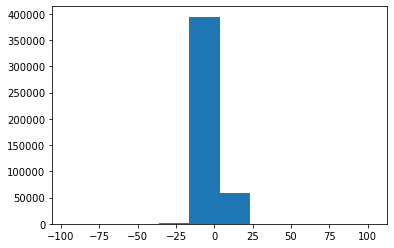

In [14]:
v_in_x = np.empty([0])
for d in tqdm(range(3200)):
    for key, value in train_data.__getitem__(d).items():
        if key == "v_in":
            for i in range(60):
                if value[i].all() != 0:
                    for j in range(19):
                        v_in_x = np.append(v_in_x, value[i][j][0])

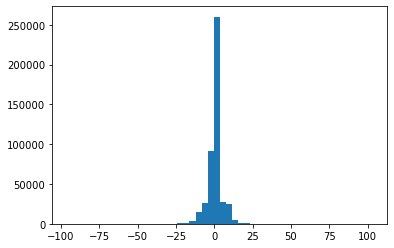

In [28]:
fig = plt.hist(v_in_x, bins=50)

100%|██████████| 3200/3200 [01:14<00:00, 42.93it/s]


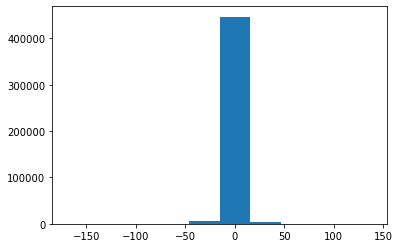

In [15]:
v_in_y = np.empty([0])
for d in tqdm(range(3200)):
    for key, value in train_data.__getitem__(d).items():
        if key == "v_in":
            for i in range(60):
                if value[i].all() != 0:
                    for j in range(19):
                        v_in_y = np.append(v_in_y, value[i][j][1])

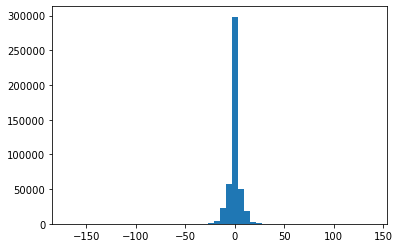

In [26]:
fig = plt.hist(v_in_y, bins=50)

100%|██████████| 3200/3200 [06:56<00:00,  7.68it/s]


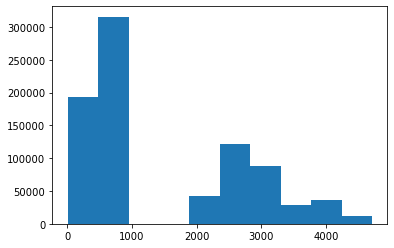

In [29]:
p_out_x = np.empty([0])
for d in tqdm(range(3200)):
    for key, value in train_data.__getitem__(d).items():
        if key == "p_out":
            for i in range(60):
                if value[i].all() != 0:
                    for j in range(30):
                        p_out_x = np.append(p_out_x, value[i][j][0])

fig = plt.hist(p_out_x, bins=10)

100%|██████████| 3200/3200 [04:07<00:00, 12.95it/s]


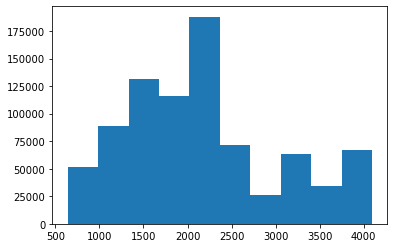

In [30]:
p_out_y = np.empty([0])
for d in tqdm(range(3200)):
    for key, value in train_data.__getitem__(d).items():
        if key == "p_out":
            for i in range(60):
                if value[i].all() != 0:
                    for j in range(30):
                        p_out_y = np.append(p_out_y, value[i][j][1])

fig = plt.hist(p_out_y, bins=10)

100%|██████████| 3200/3200 [02:41<00:00, 19.84it/s]


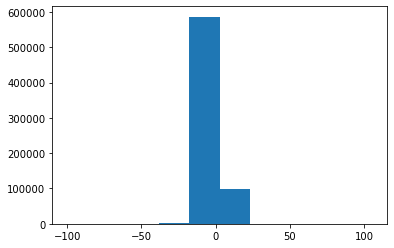

In [31]:
v_out_x = np.empty([0])
for d in tqdm(range(3200)):
    for key, value in train_data.__getitem__(d).items():
        if key == "v_out":
            for i in range(60):
                if value[i].all() != 0:
                    for j in range(30):
                        v_out_x = np.append(v_out_x, value[i][j][0])

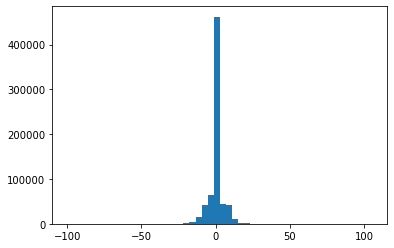

In [34]:
fig = plt.hist(v_out_x, bins=50)

100%|██████████| 3200/3200 [02:48<00:00, 19.04it/s]


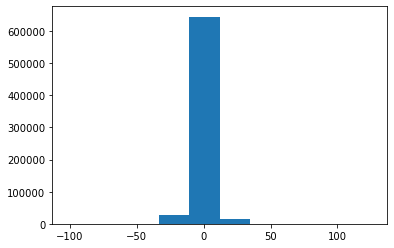

In [32]:
v_out_y = np.empty([0])
for d in tqdm(range(3200)):
    for key, value in train_data.__getitem__(d).items():
        if key == "v_out":
            for i in range(60):
                if value[i].all() != 0:
                    for j in range(30):
                        v_out_y = np.append(v_out_y, value[i][j][1])

fig = plt.hist(v_out_y, bins=50)

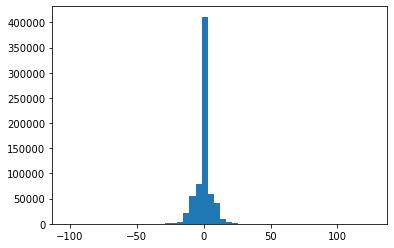

In [35]:
fig = plt.hist(v_out_y, bins=50)

In [36]:
distance = np.linalg.norm(p_in_x - p_out_x)
print(distance)

ValueError: operands could not be broadcast together with shapes (531221,) (838770,) 